# Ejercicio 8

## Simulación del Tiempo de Arribo a un Servicio con Distribución Exponencial  

La distribución exponencial es común para modelar tiempos entre eventos en procesos de Poisson, como llegadas a un servicio.  

### **Distribución Exponencial**  

La distribución exponencial tiene la siguiente función de densidad de probabilidad (PDF): 

$$
f(x) = \lambda e^{-\lambda x}
$$  

Donde:  

- **λ** es la tasa de llegada (**λ = 1 / μ**).  
- **μ** es la media (en este caso, **μ = 0.5**).  

La función de distribución acumulada (CDF) es:  

$$
F(x) = 1 - e^{-\lambda x}
$$  

Para generar valores de una distribución exponencial, usamos el **método de la transformada inversa**:  

$$
X = -\frac{\ln(1 - R)}{\lambda}
$$  

Donde **R** es un número aleatorio uniforme en **[0,1]**.  


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parámetros de la distribución exponencial
media = 0.5
lambda_ = 1 / media  # Tasa de llegada

# Simulación de tiempos de arribo
np.random.seed(42)  # Para reproducibilidad
R = np.random.rand(1000)  # Generar 1000 números aleatorios uniformes en [0, 1]
tiempos_arribo = -np.log(1 - R) / lambda_  # Aplicar la transformada inversa

# Mostrar los primeros 10 tiempos de arribo generados
print("Primeros 10 tiempos de arribo:", tiempos_arribo[:10])

Primeros 10 tiempos de arribo: [0.23463404 1.50506072 0.65837285 0.45647128 0.08481244 0.08479815
 0.02991938 1.00561543 0.45954108 0.61562503]


## Comprobación de los Resultados  

Para comprobar que los tiempos de arribo generados siguen una distribución exponencial, comparamos la muestra generada con la distribución teórica. Podemos hacerlo de dos maneras:  

### **1. Comparación Visual**  
- Graficar el **histograma** de la muestra generada.  
- Superponer la **función de densidad de probabilidad (PDF)** teórica de la distribución exponencial.  

### **2. Prueba de Bondad de Ajuste**  
- Usar la **prueba de Kolmogorov-Smirnov (K-S)** para comparar la muestra con la distribución teórica.  
- Evaluar el **p-valor**:
  - Si **p > 0.05**, no hay evidencia suficiente para rechazar que la muestra sigue una distribución exponencial.  
  - Si **p ≤ 0.05**, la muestra no sigue la distribución exponencial esperada.  


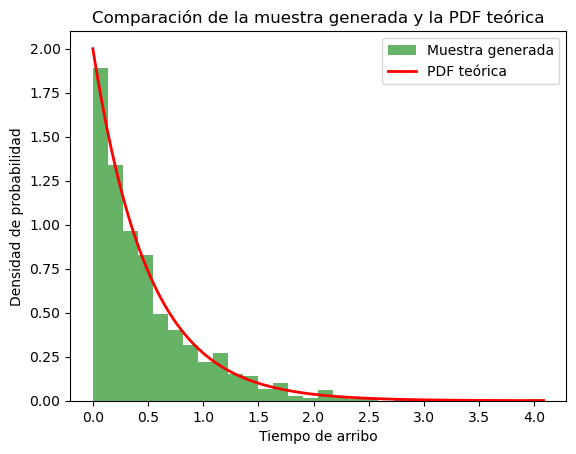

In [103]:
# Graficar el histograma de la muestra
plt.hist(tiempos_arribo, bins=30, density=True, alpha=0.6, color='g', label='Muestra generada')

# Graficar la PDF teórica
x = np.linspace(0, max(tiempos_arribo), 1000)
pdf_teorica = expon.pdf(x, scale=media)  # PDF teórica
plt.plot(x, pdf_teorica, 'r-', lw=2, label='PDF teórica')

# Configuración del gráfico
plt.xlabel('Tiempo de arribo')
plt.ylabel('Densidad de probabilidad')
plt.title('Comparación de la muestra generada y la PDF teórica')
plt.legend()
plt.show()

In [105]:
# Aplicar la prueba de K-S
estadistico_D, p_valor = kstest(tiempos_arribo, 'expon', args=(0, media))

# Mostrar resultados de la prueba
print(f"Estadístico D: {estadistico_D}")
print(f"p-valor: {p_valor}")

# Interpretación del p-valor
if p_valor > 0.05:
    print("No hay evidencia suficiente para rechazar que la muestra sigue una distribución exponencial.")
else:
    print("La muestra NO sigue una distribución exponencial.")

Estadístico D: 0.029956251442476656
p-valor: 0.3243752124357744
No hay evidencia suficiente para rechazar que la muestra sigue una distribución exponencial.
